In [1]:
import pandas as pd

titanic = pd.read_csv('titanic.data')

In [2]:
titanic.shape

(891, 12)

In [11]:
titanic['previsao'] = 1

In [5]:
titanic.shape

(891, 13)

In [13]:
def acuracia(titanic):
  return (titanic['Survived'] == titanic['previsao']).sum() / len(titanic) * 100

In [23]:
titanic['previsao'] = 0

print(acuracia(titanic))

titanic['previsao'][titanic['Sex'] == 'female'] = 1

print(acuracia(titanic))

#titanic['previsao'][titanic['Pclass'] == 1] = 1

#print(acuracia(titanic))

titanic['previsao'][(titanic['Pclass'] == 1) & (titanic['Age'] > 45) | ((titanic['Age'] < 15))] = 1

print(acuracia(titanic))

61.61616161616161
78.67564534231201
76.76767676767676


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]


#### Aprendizado automático (Machine learning)

In [29]:
titanic.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
previsao         0
dtype: int64

In [28]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()  # F -> função ou modelo

titanic['Sex'][titanic['Sex'] == 'male'] = 0
titanic['Sex'][titanic['Sex'] == 'female'] = 1
titanic['Sex'] = pd.to_numeric(titanic['Sex'])

titanic.fillna({'Age':titanic.Age.mean()}, inplace=True)

# treinamento : X -> dados e y -> rótulos
knn.fit(titanic[['Sex','Age','Pclass']], titanic['Survived'])


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [36]:
y_pred = knn.predict(titanic[['Sex','Age','Pclass']])

In [37]:
# acuracia (de novo)

(y_pred == titanic.Survived).sum() / len(y_pred) * 100

81.70594837261504

In [49]:
# separação de treino e teste (hold-out)

from sklearn.model_selection import train_test_split

X = titanic[['Sex','Age','Pclass']]
y = titanic.Survived

# 30% teste, então sobra 70% treino
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=2021)

melhor_modelo = None
melhor_acc = None

# hiper parametrização (grid search)

for k in range(1,41):

  knn = KNeighborsClassifier(n_neighbors = k)

  # treinamento
  knn.fit(X_train, y_train)

  # teste
  y_pred = knn.predict(X_test)

  # acurácia
  acc = (y_pred == y_test).sum() / len(y_pred) * 100
  print('K:', k, "-", acc)

  if melhor_acc is None or melhor_acc < acc:
      melhor_modelo = knn
      melhor_acc = acc


print('Melhor modelo:', melhor_modelo)
print('Melhor acurácia obtida:', melhor_acc)


K: 1 - 70.8955223880597
K: 2 - 72.01492537313433
K: 3 - 71.64179104477611
K: 4 - 72.76119402985076
K: 5 - 72.01492537313433
K: 6 - 73.13432835820896
K: 7 - 71.26865671641791
K: 8 - 73.13432835820896
K: 9 - 73.88059701492537
K: 10 - 73.50746268656717
K: 11 - 72.76119402985076
K: 12 - 72.76119402985076
K: 13 - 73.88059701492537
K: 14 - 72.38805970149254
K: 15 - 71.26865671641791
K: 16 - 70.8955223880597
K: 17 - 72.38805970149254
K: 18 - 69.77611940298507
K: 19 - 73.50746268656717
K: 20 - 73.50746268656717
K: 21 - 72.76119402985076
K: 22 - 73.13432835820896
K: 23 - 72.76119402985076
K: 24 - 72.01492537313433
K: 25 - 73.13432835820896
K: 26 - 72.38805970149254
K: 27 - 72.76119402985076
K: 28 - 72.38805970149254
K: 29 - 72.76119402985076
K: 30 - 72.01492537313433
K: 31 - 72.76119402985076
K: 32 - 72.38805970149254
K: 33 - 72.01492537313433
K: 34 - 69.40298507462687
K: 35 - 69.77611940298507
K: 36 - 67.16417910447761
K: 37 - 68.65671641791045
K: 38 - 67.53731343283582
K: 39 - 66.417910447761

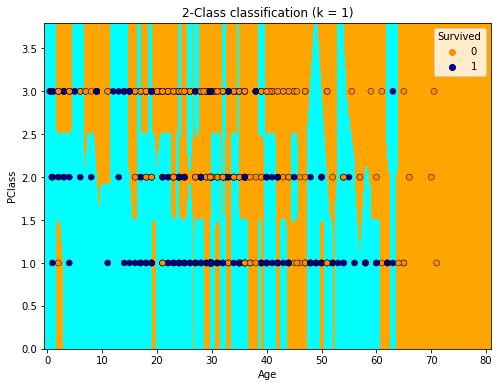

In [56]:
# decision boundary

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets

n_neighbors = 1

X = titanic[['Age','Pclass']].values
y = titanic.Survived

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, 
                                                    random_state=2021)

h = .2  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan'])
cmap_bold = ['darkorange', 'darkblue']

clf = neighbors.KNeighborsClassifier(n_neighbors)
clf.fit(X_train, y_train)

# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                      np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
sns.scatterplot(x=X_train[:, 0], y=X_train[:, 1], hue=y_train,
                palette=cmap_bold, alpha=1.0, edgecolor="black")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("2-Class classification (k = %i)"
          % (n_neighbors))
plt.xlabel("Age")
plt.ylabel("PClass")

plt.show()